In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

titanic_data_raw = pd.read_csv("train.csv")

titanic_data_raw.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
titanic_data_raw["Embarked"].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [3]:
titanic_data_raw["Cabin"].describe()

count         204
unique        147
top       B96 B98
freq            4
Name: Cabin, dtype: object

In [4]:
import numpy as np

In [5]:
titanic_data_raw["Cabin"].isna().sum()

687

In [6]:
titanic_data_raw["Housed"] = titanic_data_raw["Cabin"].isna()

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
titanic_data_raw["Housed"] = titanic_data_raw["Housed"].astype(int)
titanic_data_raw

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Housed
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0


In [9]:
titanic_data_raw["Ticket"].unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

In [10]:
titanic_data_raw["Ticket"].describe()

count        891
unique       681
top       347082
freq           7
Name: Ticket, dtype: object

In [11]:
titanic_data_raw["Cabin"].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [12]:
import re

letter_to_number = {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7, 'T': 8}

# Define a function to extract the desired number based on the first letter found
def get_number(cabin):
    if pd.isna(cabin):
        return np.nan
    
    match = re.search(r'([A-GT])\d', cabin)
    
    if match:
        return letter_to_number.get(match.group(1))
    
    return np.nan


titanic_data_raw['cabin_prefix_number'] = titanic_data_raw['Cabin'].apply(get_number)

In [13]:
titanic_data_raw

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Housed,cabin_prefix_number
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,3.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,3.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,1,NaN
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0,2.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,1,NaN
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0,3.0


In [14]:
titanic_data = titanic_data_raw[["PassengerId", "Survived", "Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked", "Housed", "cabin_prefix_number"]]
titanic_data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Housed,cabin_prefix_number
0,1,0,3,male,22.0,1,0,7.2500,S,1,NaN
1,2,1,1,female,38.0,1,0,71.2833,C,0,3.0
2,3,1,3,female,26.0,0,0,7.9250,S,1,NaN
3,4,1,1,female,35.0,1,0,53.1000,S,0,3.0
4,5,0,3,male,35.0,0,0,8.0500,S,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S,1,NaN
887,888,1,1,female,19.0,0,0,30.0000,S,0,2.0
888,889,0,3,female,NaN,1,2,23.4500,S,1,NaN
889,890,1,1,male,26.0,0,0,30.0000,C,0,3.0


In [15]:
titanic_data['Sex'] = titanic_data['Sex'].map({'male': 0, 'female': 1})
titanic_data

/var/folders/rw/h_hj3nk97m72q3xd2rt2q6r80000gn/T/ipykernel_47583/4015863479.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_data['Sex'] = titanic_data['Sex'].map({'male': 0, 'female': 1})


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Housed,cabin_prefix_number
0,1,0,3,0,22.0,1,0,7.2500,S,1,NaN
1,2,1,1,1,38.0,1,0,71.2833,C,0,3.0
2,3,1,3,1,26.0,0,0,7.9250,S,1,NaN
3,4,1,1,1,35.0,1,0,53.1000,S,0,3.0
4,5,0,3,0,35.0,0,0,8.0500,S,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.0,0,0,13.0000,S,1,NaN
887,888,1,1,1,19.0,0,0,30.0000,S,0,2.0
888,889,0,3,1,NaN,1,2,23.4500,S,1,NaN
889,890,1,1,0,26.0,0,0,30.0000,C,0,3.0


In [16]:
titanic_data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Housed,cabin_prefix_number
0,1,0,3,0,22.0,1,0,7.2500,S,1,NaN
1,2,1,1,1,38.0,1,0,71.2833,C,0,3.0
2,3,1,3,1,26.0,0,0,7.9250,S,1,NaN
3,4,1,1,1,35.0,1,0,53.1000,S,0,3.0
4,5,0,3,0,35.0,0,0,8.0500,S,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.0,0,0,13.0000,S,1,NaN
887,888,1,1,1,19.0,0,0,30.0000,S,0,2.0
888,889,0,3,1,NaN,1,2,23.4500,S,1,NaN
889,890,1,1,0,26.0,0,0,30.0000,C,0,3.0


In [17]:
titanic_data['Embarked'] = titanic_data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
titanic_data

/var/folders/rw/h_hj3nk97m72q3xd2rt2q6r80000gn/T/ipykernel_47583/1514400926.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_data['Embarked'] = titanic_data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Housed,cabin_prefix_number
0,1,0,3,0,22.0,1,0,7.2500,0.0,1,NaN
1,2,1,1,1,38.0,1,0,71.2833,1.0,0,3.0
2,3,1,3,1,26.0,0,0,7.9250,0.0,1,NaN
3,4,1,1,1,35.0,1,0,53.1000,0.0,0,3.0
4,5,0,3,0,35.0,0,0,8.0500,0.0,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.0,0,0,13.0000,0.0,1,NaN
887,888,1,1,1,19.0,0,0,30.0000,0.0,0,2.0
888,889,0,3,1,NaN,1,2,23.4500,0.0,1,NaN
889,890,1,1,0,26.0,0,0,30.0000,1.0,0,3.0


In [18]:
import matplotlib.pyplot as plt

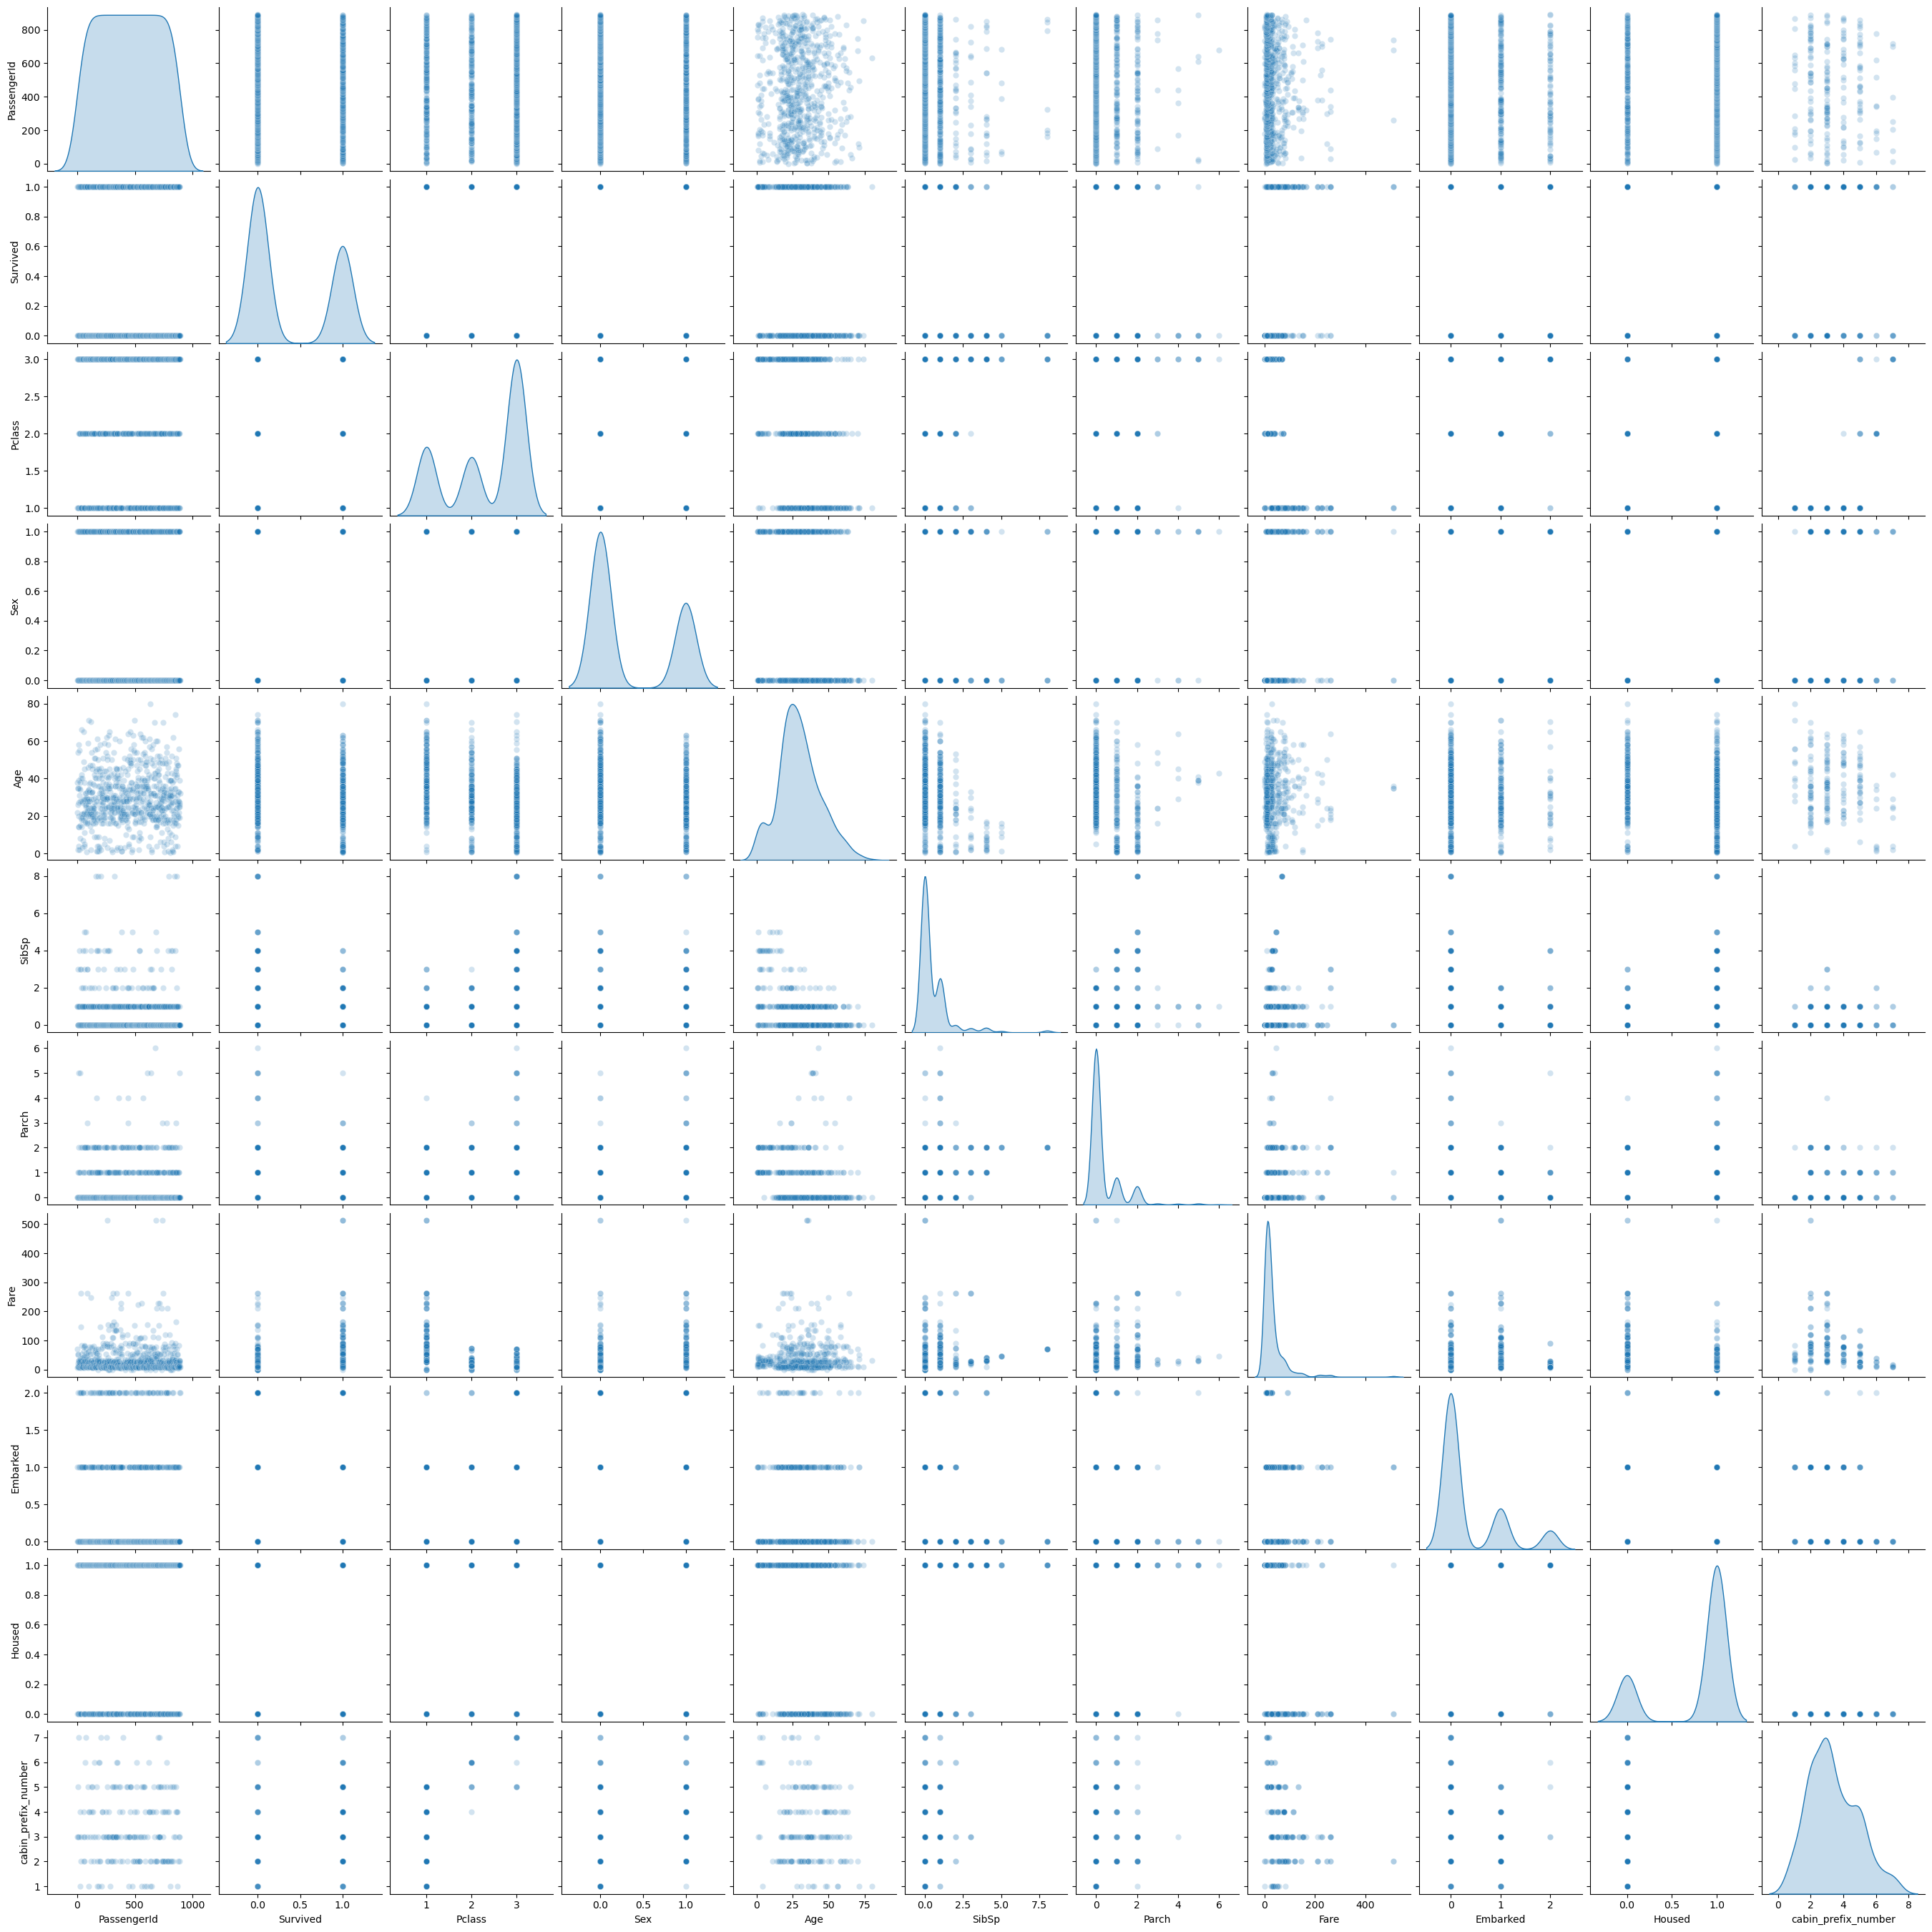

In [19]:
sns.pairplot(titanic_data, diag_kind="kde", plot_kws={"alpha": 0.2})
plt.show()

In [20]:
titanic_data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Housed,cabin_prefix_number
0,1,0,3,0,22.0,1,0,7.2500,0.0,1,NaN
1,2,1,1,1,38.0,1,0,71.2833,1.0,0,3.0
2,3,1,3,1,26.0,0,0,7.9250,0.0,1,NaN
3,4,1,1,1,35.0,1,0,53.1000,0.0,0,3.0
4,5,0,3,0,35.0,0,0,8.0500,0.0,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.0,0,0,13.0000,0.0,1,NaN
887,888,1,1,1,19.0,0,0,30.0000,0.0,0,2.0
888,889,0,3,1,NaN,1,2,23.4500,0.0,1,NaN
889,890,1,1,0,26.0,0,0,30.0000,1.0,0,3.0


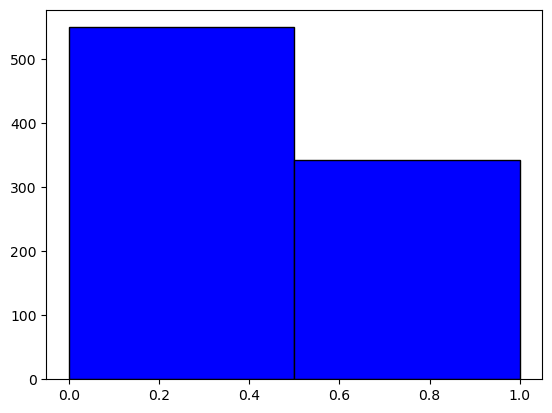

In [21]:
plt.hist(titanic_data["Survived"], bins=2, color='blue', edgecolor='black')
plt.show()

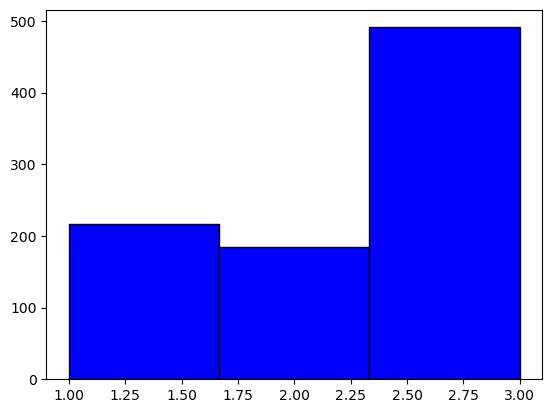

In [22]:
plt.hist(titanic_data["Pclass"], bins=3, color='blue', edgecolor='black')
plt.show()

In [23]:
features = [x for x in titanic_data.columns if x not in ["Survived"]]
features

['PassengerId',
 'Pclass',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Fare',
 'Embarked',
 'Housed',
 'cabin_prefix_number']

In [24]:
x_train, x_dev, y_train, y_dev = train_test_split(titanic_data[features], 
                                                  titanic_data["Survived"], 
                                                  train_size=0.75,
                                                  random_state=42)

In [25]:
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier 

xgbmodel = XGBClassifier(n_estimators = 500, learning_rate = 0.1, verbosity = 1, random_state = 42)
xgbmodel.fit(x_train, y_train, eval_set = [(x_dev, y_dev)], early_stopping_rounds = 10)

[0]	validation_0-logloss:0.64518
[1]	validation_0-logloss:0.60546
[2]	validation_0-logloss:0.57291
[3]	validation_0-logloss:0.54813
[4]	validation_0-logloss:0.52627
[5]	validation_0-logloss:0.51053
[6]	validation_0-logloss:0.49725
[7]	validation_0-logloss:0.48372
[8]	validation_0-logloss:0.47506
[9]	validation_0-logloss:0.46427
[10]	validation_0-logloss:0.45812
[11]	validation_0-logloss:0.45202
[12]	validation_0-logloss:0.44596
[13]	validation_0-logloss:0.44244
[14]	validation_0-logloss:0.43812
[15]	validation_0-logloss:0.43557
[16]	validation_0-logloss:0.43369
[17]	validation_0-logloss:0.43260
[18]	validation_0-logloss:0.43149
[19]	validation_0-logloss:0.43171
[20]	validation_0-logloss:0.43011
[21]	validation_0-logloss:0.43043
[22]	validation_0-logloss:0.43086
[23]	validation_0-logloss:0.43305
[24]	validation_0-logloss:0.43464
[25]	validation_0-logloss:0.43488
[26]	validation_0-logloss:0.43530
[27]	validation_0-logloss:0.43561
[28]	validation_0-logloss:0.43582
[29]	validation_0-loglos

/Users/dougdahl/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=500, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [26]:
from sklearn.metrics import accuracy_score

y_pred = xgbmodel.predict(x_train)

# Calculate accuracy
accuracy = accuracy_score(y_train, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 90.72%


In [27]:
y_pred_dev = xgbmodel.predict(x_dev)

# Calculate accuracy
accuracy = accuracy_score(y_dev, y_pred_dev)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 83.86%


In [28]:
import pandas as pd
def processData(data):
    labels = data["Survived"]
    data = data.set_index("PassengerId")
    data["Housed"] = data["Cabin"].isna()
    data["Housed"] = data["Housed"].astype(int)
    data['cabin_prefix_number'] = data['Cabin'].apply(get_number)
    data["travelled_alone"] = (data["SibSp"] == 0) & (data["Parch"] == 0)
    data["travelled_alone"] = data["travelled_alone"].astype(int)
    data = data[["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked", "Housed", "travelled_alone"]]
    data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})
    data['Embarked'] = data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
    data["Age"].fillna(data["Age"].median(), inplace=True)
    data = data.fillna(0)

    
    features = [x for x in data.columns if x not in ["Survived"]]
    
    return data[features], labels



titanic_data_copy = pd.read_csv("train.csv")

titanic_data_processed, titanic_data_processed_labels = processData(titanic_data_copy)
titanic_data_processed


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Housed,travelled_alone
PassengerId,,,,,,,,,
1,3,0,22.0,1,0,7.2500,0.0,1,0
2,1,1,38.0,1,0,71.2833,1.0,0,0
3,3,1,26.0,0,0,7.9250,0.0,1,1
4,1,1,35.0,1,0,53.1000,0.0,0,0
5,3,0,35.0,0,0,8.0500,0.0,1,1
...,...,...,...,...,...,...,...,...,...
887,2,0,27.0,0,0,13.0000,0.0,1,1
888,1,1,19.0,0,0,30.0000,0.0,0,1
889,3,1,28.0,1,2,23.4500,0.0,1,0


In [29]:

test_data = pd.read_csv("test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [30]:
def processTestData(data):
    data = data.set_index("PassengerId")
    data["Housed"] = data["Cabin"].isna()
    data["Housed"] = data["Housed"].astype(int)
    data['cabin_prefix_number'] = data['Cabin'].apply(get_number)
    data["travelled_alone"] = (data["SibSp"] == 0) & (data["Parch"] == 0)
    data["travelled_alone"] = data["travelled_alone"].astype(int)
    data = data[["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked", "Housed", "travelled_alone"]]
    data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})
    data['Embarked'] = data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
    data["Age"].fillna(data["Age"].median(), inplace=True)
    data = data.fillna(0)
    
    return data

In [31]:
test_data_processed = processTestData(test_data) 

In [32]:
test_data_processed.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Housed,travelled_alone
PassengerId,,,,,,,,,
892,3,0,34.5,0,0,7.8292,2,1,1
893,3,1,47.0,1,0,7.0000,0,1,0
894,2,0,62.0,0,0,9.6875,2,1,1
895,3,0,27.0,0,0,8.6625,0,1,1
896,3,1,22.0,1,1,12.2875,0,1,0


In [33]:
xgbmodel_1 = XGBClassifier(n_estimators = 500, learning_rate = 0.1, verbosity = 1, random_state = 42)



x_train, x_dev, y_train, y_dev = train_test_split(titanic_data_processed, 
                                                  titanic_data_processed_labels, 
                                                  train_size=0.75,
                                                  random_state=42)

xgbmodel_1.fit(x_train, y_train, eval_set = [(x_dev, y_dev)], early_stopping_rounds = 10)

[0]	validation_0-logloss:0.64715
[1]	validation_0-logloss:0.60931


/Users/dougdahl/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[2]	validation_0-logloss:0.57826
[3]	validation_0-logloss:0.55230
[4]	validation_0-logloss:0.53294
[5]	validation_0-logloss:0.51533
[6]	validation_0-logloss:0.50340
[7]	validation_0-logloss:0.48937
[8]	validation_0-logloss:0.48142
[9]	validation_0-logloss:0.47444
[10]	validation_0-logloss:0.46887
[11]	validation_0-logloss:0.46201
[12]	validation_0-logloss:0.45659
[13]	validation_0-logloss:0.45217
[14]	validation_0-logloss:0.44746
[15]	validation_0-logloss:0.44469
[16]	validation_0-logloss:0.44185
[17]	validation_0-logloss:0.43972
[18]	validation_0-logloss:0.43901
[19]	validation_0-logloss:0.43800
[20]	validation_0-logloss:0.43686
[21]	validation_0-logloss:0.43696
[22]	validation_0-logloss:0.43454
[23]	validation_0-logloss:0.43504
[24]	validation_0-logloss:0.43526
[25]	validation_0-logloss:0.43591
[26]	validation_0-logloss:0.43445
[27]	validation_0-logloss:0.43367
[28]	validation_0-logloss:0.43516
[29]	validation_0-logloss:0.43559
[30]	validation_0-logloss:0.43526
[31]	validation_0-logl

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=500, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [34]:
y_pred = xgbmodel_1.predict(x_train)

# Calculate accuracy
accuracy = accuracy_score(y_train, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 90.12%


In [35]:
y_pred_dev = xgbmodel_1.predict(x_dev)

# Calculate accuracy
accuracy = accuracy_score(y_dev, y_pred_dev)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 82.06%


In [36]:
test_data_processed["Survived"] = xgbmodel_1.predict(test_data_processed)
test_data_processed

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Housed,travelled_alone,Survived
PassengerId,,,,,,,,,,
892,3,0,34.5,0,0,7.8292,2,1,1,0
893,3,1,47.0,1,0,7.0000,0,1,0,0
894,2,0,62.0,0,0,9.6875,2,1,1,0
895,3,0,27.0,0,0,8.6625,0,1,1,0
896,3,1,22.0,1,1,12.2875,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
1305,3,0,27.0,0,0,8.0500,0,1,1,0
1306,1,1,39.0,0,0,108.9000,1,0,1,1
1307,3,0,38.5,0,0,7.2500,0,1,1,0


In [37]:
test_data_processed = test_data_processed.iloc[:, -1]
test_data_processed

PassengerId
892     0
893     0
894     0
895     0
896     1
       ..
1305    0
1306    1
1307    0
1308    0
1309    0
Name: Survived, Length: 418, dtype: int64

In [38]:
test_data_processed = test_data_processed.to_frame(name='Survived')

In [39]:
test_data_processed

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,1
...,...
1305,0
1306,1
1307,0


In [40]:
test_data_processed["PassengerId"] = test_data_processed.index
test_data_processed
#df.to_csv('sample.csv', index=False)  # 'index=False' will avoid writing row numbers


,Survived,PassengerId
PassengerId,,
892,0,892
893,0,893
894,0,894
895,0,895
896,1,896
...,...,...
1305,0,1305
1306,1,1306
1307,0,1307


In [41]:
test_data_processed = test_data_processed[["PassengerId", "Survived"]]
test_data_processed

,PassengerId,Survived
PassengerId,,
892,892,0
893,893,0
894,894,0
895,895,0
896,896,1
...,...,...
1305,1305,0
1306,1306,1
1307,1307,0


In [42]:
test_data_processed.to_csv('testresults_xgb.csv', index=False)  # 'index=False' will avoid writing row numbers


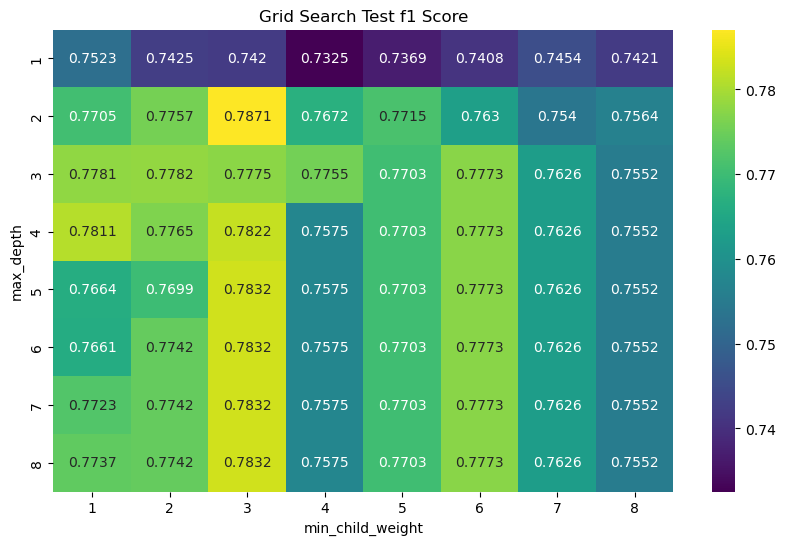

In [43]:
from sklearn.model_selection import GridSearchCV
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

xgbmodel_n = XGBClassifier(learning_rate = 0.1)

param_grid = {
    'max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
    'min_child_weight': [1, 2, 3, 4, 5, 6, 7, 8]
}

grid_search_n = GridSearchCV(xgbmodel_n, param_grid, cv=5, scoring='f1_macro', n_jobs=-1)

grid_search_n.fit(x_dev, y_dev)

# Extract mean test scores
mean_test_scores = grid_search_n.cv_results_['mean_test_score']
mean_test_scores = np.array(mean_test_scores).reshape(len(param_grid['max_depth']), len(param_grid['min_child_weight']))

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(mean_test_scores, annot=True, fmt='.4g', cmap='viridis', 
            xticklabels=param_grid['min_child_weight'], 
            yticklabels=param_grid['max_depth'])
plt.xlabel('min_child_weight')
plt.ylabel('max_depth')
plt.title('Grid Search Test f1 Score')
plt.show()

In [44]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import SGDClassifier

pipeline = make_pipeline(

    StandardScaler(),
    SGDClassifier(loss = 'log', penalty='l1'),

)


pipeline.fit(x_train, y_train)

/Users/dougdahl/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdclassifier', SGDClassifier(loss='log', penalty='l1'))])

In [45]:
y_pred_sgdclassifier = pipeline.predict(x_train)

# Calculate accuracy
accuracy = accuracy_score(y_train, y_pred_sgdclassifier)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 80.69%


In [46]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()
lr_model.fit(x_train, y_train)

y_pred_lr = lr_model.predict(x_train)

# Calculate accuracy
accuracy = accuracy_score(y_train, y_pred_lr)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 80.54%


/Users/dougdahl/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [47]:
y_pred_lr = lr_model.predict(x_dev)

# Calculate accuracy
accuracy = accuracy_score(y_dev, y_pred_lr)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 80.27%


In [48]:
titanic_data_processed, titanic_data_processed_labels = processData(titanic_data_copy)
titanic_data_processed

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Housed,travelled_alone
PassengerId,,,,,,,,,
1,3,0,22.0,1,0,7.2500,0.0,1,0
2,1,1,38.0,1,0,71.2833,1.0,0,0
3,3,1,26.0,0,0,7.9250,0.0,1,1
4,1,1,35.0,1,0,53.1000,0.0,0,0
5,3,0,35.0,0,0,8.0500,0.0,1,1
...,...,...,...,...,...,...,...,...,...
887,2,0,27.0,0,0,13.0000,0.0,1,1
888,1,1,19.0,0,0,30.0000,0.0,0,1
889,3,1,28.0,1,2,23.4500,0.0,1,0


In [49]:
test_data_processed = processTestData(test_data) 
test_data_processed["Survived"] = lr_model.predict(test_data_processed)
test_data_processed = test_data_processed.iloc[:, -1]
test_data_processed

PassengerId
892     0
893     0
894     0
895     0
896     1
       ..
1305    0
1306    1
1307    0
1308    0
1309    0
Name: Survived, Length: 418, dtype: int64

In [50]:
test_data_processed = test_data_processed.to_frame(name='Survived')
test_data_processed["PassengerId"] = test_data_processed.index
test_data_processed = test_data_processed[["PassengerId", "Survived"]]
test_data_processed.to_csv('test_results.csv', index=False)  # 'index=False' will avoid writing row numbers
